# Regresión lineal

Imagina que tenemos un dataset hipotetico donde queremos modelar el precio de los pisos en una ciudad de Chile según la superficie en metros cuadrados. 

- La entrada o **variable predictora** nos ayuda a predecir el valor de la variable de salida ($m^2$)
- La salida o **variable predecida** es la que queremos predecir (*coste mensual*)

**Nuestro dataset teorico se veria**
|Superficie ($m^2$)|Alquiler mensual ($ CLP)|
|---|----|
|150|16000|
|120|13652|
|170|19887|
|80|11914|

Nos damos cuenta que a mayor la superficie de la habitación, tabmien es mayor el alquiler mensual, por lo tanto, podemos intuir que se puede modelar con un modelo lineal.

- En el caso de la regresión lineal asumimos que el eje Y (el coste) es una función lineal de X (la superficie) y entonces es un moodelo lineal y se escribe como:

$$ y_e = \alpha + \beta \cdot x $$
$$ \text{Alquiler mensual } = \alpha + \beta \cdot \text{Superficie}$$

El objetivo de la regresión lineal es encontrar 2 valores significativos de $\alpha$ y $\beta$ para poder acercar lo mas posibles el valor $y_e$ al valor real de y.

Si somos capaces de encontrar un valor para $\alpha$ y para $\beta$ capaz de satisfacer los valores de salida a partir de los de entrada tendremos una función que es capaz de predecir los valores de salida a partir de los valores de X.

Con los datos de la tabla creamos un modelo lineal y asi podemos obtener los posibles valores para $\alpha$ y $\beta$ y obtenemos.
$$\alpha = 4531$$
$$\beta = 83$$

Por lo tanto la ecuación que mejor se ajusta a nuestros datos y nos puede servir para predecir precios a partir de la superficie es:

$$y_e = 83(x) + 4531$$

Por ejemplo si ingresamos el primer valor de X el cual es "150" obtenemos

$$y_e = 83(150)+4531 = 16981$$

Ahora vamos a graficar la regresión lineal planteada

In [6]:
from sklearn.linear_model import LinearRegression
import numpy as np
import matplotlib.pyplot as plt

superficie = [150, 120, 170, 80]
# Generar datos para formar una linea perfecta
coste_clp = [16000, 13652, 19887, 11914]
# Crear el modelo
modelo = LinearRegression()
superficie_np = np.array(superficie).reshape(-1, 1)
modelo.fit(superficie_np, coste_clp)

LinearRegression()

Alpha:  4531.989130434786
Beta:  [83.3173913]


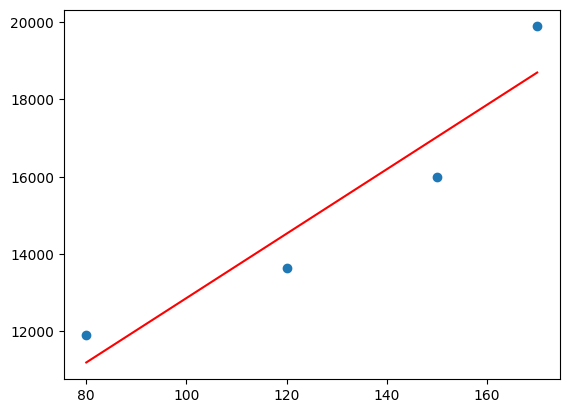

In [7]:
print("Alpha: ", modelo.intercept_)
print("Beta: ", modelo.coef_)

# Grafico 
plt.scatter(superficie, coste_clp)
# Prediccion
valores_continuos = np.linspace(min(superficie), max(superficie), 200)
linea = modelo.predict(valores_continuos.reshape(-1, 1))
plt.plot(valores_continuos, linea, c="red") 

El objetivo es encontrar una ecuacion lineal minimice las diferencias entre el resultado de la ecuación y el valor real. El error se define como:

$$ e_i = (y_i - Y_e(X_i)) $$

Y el objetivo es encontrar 2 valores tales que minimicen la suma de los errores al cuadrado:

$$\sum\limits_{i=0}^{n}{e^2_i} = \sum\limits_{i=0}^{n}{(y_i - Y_e(X_i))^2} = \sum\limits_{i=0}^{n}{(y_i - (\alpha(x_i) + \beta))^2}$$

Para despejar los parámetros de esta ecuación podemos decir que:

$$
\beta = \frac{Cov(x,y)}{Var(x,y)} = \frac{\sum\limits^n_{i=1}{(x_i-\overline{x})(y_i - \overline{y})}}{\sum\limits^n_{i=1}{(x_i - \overline{x}})^2}
$$

Donde $\overline{x}$ Es la media

$$
\alpha = \overline{y} - \beta \cdot \overline{x}
$$

Despejamos la ecuación sabiendo el valor de $\beta$


La estimación de Y para la regresión lineal seguirá un modelo perfectamente lineal, eso no es realmente lo que pasa en la vida real, por lo tanto se le suma una *componente residual llamada $\epsilon$*.

Modelo + residuo:
$$
y = \alpha (x) + \beta + \epsilon
$$

El residuo es una variable aleatoria que sigue una distribución normal.

Vamos a empezar a crear nuestro primer modelo de regresión lineal y el primero de los ejemplos va a ser con datos simulados. Vamos a simular datos para dos variables para ver como predecir la Y estimada en función de X. 

Recordar que el modelo lineal busca:
$$
y = a(x) + b
$$

**Descripción de la simulación**:
- X: Serán 100 valores distribuidos segun una N(1.5, 2.5)
- y_e: Será 2(x)+0.3 + e
- e estará normalmente distribuido según una N(0.0.8)




In [8]:
import pandas as pd
# Generar la distribución de X
x = 1.5 + 2.5 * np.random.randn(100) # 100 valores aleatorios normalmente distribuidos con media 1.5 y desviación 2.5
# Generar los residuos
res = 0.8 * np.random.randn(100) # 100 valores aleatorios normalmente distribuidos con media 0 y desviación 0.8
# Generar la distribución de la predicción de Y
y_pred = 2*x + 0.3
# Generar la distribución de Y
y_act = 2*x + 0.3 + res

x_list = x.tolist()
y_pred_list = y_pred.tolist()
y_act_list = y_act.tolist()

data = pd.DataFrame(
    {
        "x": x_list,
        "y_actual": y_act_list,
        "y_prediccion": y_pred_list
    }
)

data.head()

,x,y_actual,y_prediccion
0,-0.816554,-0.604784,-1.333108
1,-0.019423,0.823502,0.261154
2,1.665248,3.892477,3.630495
3,4.533894,9.176267,9.367787
4,1.161555,2.281382,2.623110


Text(0.5, 1.0, 'Valor actual vs Predicción')

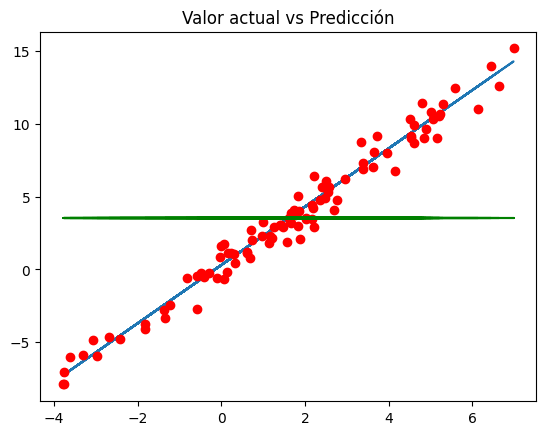

In [9]:
import matplotlib.pyplot as plt
plt.plot(data["x"], data["y_prediccion"])
plt.plot(data["x"], data["y_actual"], "ro")
y_mean = [np.mean(y_act) for i in range(1, len(x_list) + 1)]
plt.plot(data["x"], y_mean, "g")
plt.title("Valor actual vs Predicción")


¿Por que pintamos el promedio?, esto es porque en caso de que no tengamos un modelo predictor lo suficientemente preciso podemos elegir el promedio de los valores observados y decir que el promedio va a ser o no ser una manera de calcular los valores.

Si nosotros tenemos datos que contienen dos variables, entradas y salidas, nuestro programa va a generar unos valores de $\alpha$ y $\beta$, pero ¿como podemos entender los valores entregados por el modelo?.

En el caso que tenemos, **los puntos estan relativamente cerca del modelo lineal**. Si tenemos un punto que ésta desplazado de la linea azul, la distancia del valor observado hasta el modelo hay un pequeño desplazamiento, y ese desplazamiento se denomina la **variación con respecto al modelo**. El modelo no puede explicar por que se separa tanto o tampoco del valor actual.

Esta distancia es la **Diferencia respecto al modelo**. Entonces luego tenemos que tampoco esta sobre la media (linea verde), por lo tanto desde el punto observado hasta el promedio tenemos otra distancia que se denomina **Diferencia cuadrativa con respecto al modelo**. 

Y tambien exist un tercer valor que es la diferencia que existe entre la recta de regresión y la recta promedio o la distancia entre la regresión y el modelo y esta se llama **diferencia de los cuadrados de la predicción**. Estros tres valores forman 3 unidades de medida

- SSD (Suma de los cuadrados de las diferencias): Es el error aleatorio que no podemos controlar.
- SST (Suma de los cuadrados totales): Es el error entre los puntos y el promedio.
- SSR (Suma de los cuadrados de la regresión): Es el error entre la regresión y el promedio.

En un mundo que fuera perfecto, los puntos estarian encima de la recta, y las diferencias de los cuadrados de la suma desapareceria y la suma de los cuadrados totales coincidiria con la suma de la regresión.

Para cada uno de los puntos podriamos calcular las distancias totales para cada una de las metricas. Esta distancia entre el punto y el promedio, indica el error que tendriamos en el caso de tomar como modelo el promedio de la distribución. 

Con estas metricas nace el siguiente teorema:
$$
SST = SSR = SSD
$$

Y desde aqui se define un estadistico para saber si **una regresión es util o no** que se denomina $R^2$ que se define por:

$$
R^2= \frac{SSR}{SST}
$$

Este número sera siempre **menor o igual a 1** y mientras mas **cercano sea $R^2$ a 1, nuestro modelo lineal será mejor para explicar los datos**.

Si bien $R^2$ es un buen indicador de que el modelo ha sido efectivo, no puede determinar por si solo si el modelo ha ajustado correctamente o no.

In [10]:
# Para calcular SST SSD y SSR
data["SSR"] = (data["y_prediccion"] - np.mean(y_act))**2
data["SSD"] = (data["y_prediccion"] - data["y_actual"])**2
data["SST"] = (data["y_actual"] - np.mean(y_act))**2

SSR = sum(data["SSR"])
SSD = sum(data["SSD"])
SST = sum(data["SST"])

print("Suma de los cuadrados de la regresión (SSR): ", round(SSR, 2))
print("Suma de los cuadrados de la diferencia (SSD): ", round(SSD, 2))
print("Suma de los cuadrados totales (SST): ", round(SST, 2))
print("SSR + SSD = ", SSR + SSD, "= SST: ", round(SST, 2))
print("Diferencia entre SST y SSR + SSD: ", round((SSR + SSD)-SST, 2))

# Teniendo en cuenta estos valores podemos determinar que el modelo es bueno
# Que SSR sea 2787 teniendo solo 100 muestras significa que el la mayoria de los casos pueden ser explicados por el modelo, significa que el 97.7% de los datos se pueden explicar por el modelo
# Que el SSD sea 90.02 con 100 muestras significa que el modelo no es perfecto, pero es bueno, significa que el 90.02% de los datos se pueden explicar por el modelo
# Que el SST sea 2850 con 100 muestras significa que el porcentaje de variabilidad de los datos es del 98.2% explicado por el modelo


Suma de los cuadrados de la regresión (SSR):  2527.18
Suma de los cuadrados de la diferencia (SSD):  67.13
Suma de los cuadrados totales (SST):  2573.06
SSR + SSD =  2594.3045584748406 = SST:  2573.06
Diferencia entre SST y SSR + SSD:  21.25


(array([ 4.,  4.,  9., 11., 23., 17., 15.,  8.,  5.,  4.]),
 array([-1.98859723, -1.61452812, -1.24045901, -0.8663899 , -0.49232079,
        -0.11825168,  0.25581743,  0.62988654,  1.00395565,  1.37802476,
         1.75209387]),
 <BarContainer object of 10 artists>)

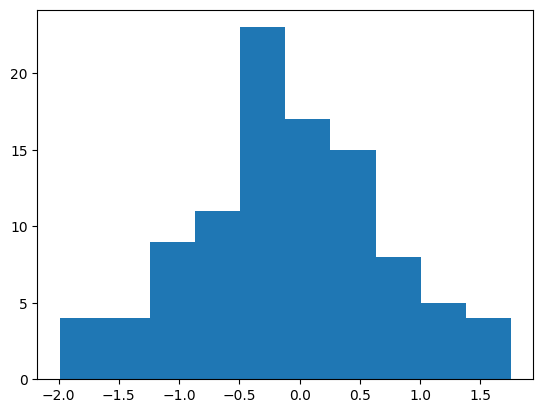

In [11]:
# Distribucion de los residuos
plt.hist(data["y_actual"] - data["y_prediccion"], bins=10)

Si bien hasta ahora solo hemos estudiado como se comportaba esa regresión ficticia, ahora vamos a intentar predecir el valor actual. para eso vamos a usar las formulas que habiamos visto anteriormente

$$y = \alpha (x) * \beta$$
$$b = \frac{cov(x, y)}{var(x, y)}$$
$$\alpha = y_n - b * x_m$$

In [18]:
def lineal_regression(x, y):
    beta_variance = np.sum((x - np.mean(x))**2)
    beta_covariance = np.sum((x - np.mean(x)) * (y - np.mean(y)))
    beta = beta_covariance / beta_variance
    alpha = np.mean(y) - beta * np.mean(x)
    print("Alpha: ", alpha)
    print("Beta: ", beta)
    return lambda x: alpha + beta * x

lineal_regression(data["x"], data["y_actual"])

# Error cuadratico medio
def error_cuadratico_medio(y, y_pred):
    return np.sum((y - y_pred)**2) / len(y)

error_cuadratico_medio(data["y_actual"], data["y_prediccion"])


Alpha:  0.20285700153122654
Beta:  1.9925384166428797


0.6712584884738773

Alpha:  0.20285700153122654
Beta:  1.9925384166428797


Text(0.5, 1.0, 'Recta de regresión')

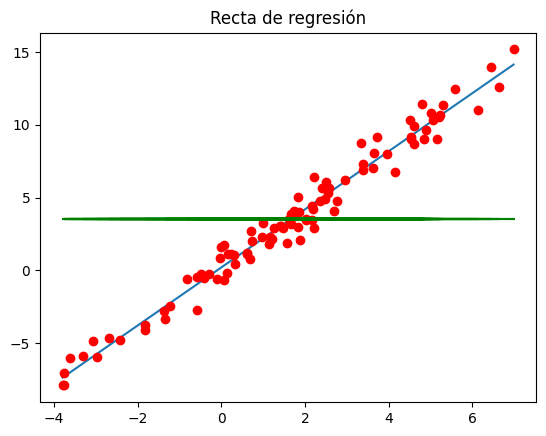

In [37]:
# Graficar la recta de regresion
modelo = lineal_regression(data["x"], data["y_actual"])
x_real = np.linspace(min(data["x"]), max(data["x"]), 100)
y_pred = modelo(x_real)
plt.plot(x_real, y_pred)
plt.plot(data["x"], data["y_actual"], "ro")
# Graficar la media
y_mean = [np.mean(y_act) for i in range(1, len(x_list) + 1)]
plt.plot(data["x"], y_mean, "g")
plt.title("Recta de regresión")


(array([ 4.,  4.,  9., 11., 23., 17., 15.,  8.,  5.,  4.]),
 array([-1.98859723, -1.61452812, -1.24045901, -0.8663899 , -0.49232079,
        -0.11825168,  0.25581743,  0.62988654,  1.00395565,  1.37802476,
         1.75209387]),
 <BarContainer object of 10 artists>)

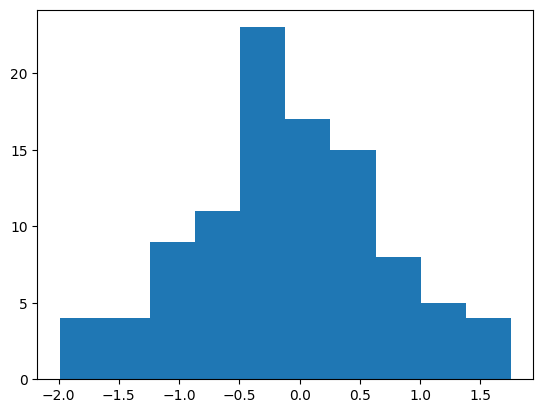

In [38]:
# Grafico de los residuos
plt.hist(data["y_actual"] - data["y_prediccion"], bins=10)
# Los residuos estan normalmente distribuidos.

In [49]:
def compute_r2(y, y_pred):
    u = ((y - y_pred)**2).sum()
    v = ((y - np.mean(y))**2).sum()
    return 1 - u/v

r2 = compute_r2(data["y_actual"], data["y_prediccion"])
print("R2: ", r2)

# Un coeficiente R2 del 0.97 significa que el modelo explica el 97% de la variabilidad de los datos

def compute_ssr_sst_ssd(y, y_pred):
    ssr = ((y_pred - np.mean(y))**2).sum()
    ssd = ((y_pred - y)**2).sum()
    sst = ((y - np.mean(y))**2).sum()
    return ssr, ssd, sst

def compute_rse(y, y_pred):
    return np.sqrt(np.sum((y - y_pred)**2) / (len(y) - 2))

ssr, ssd, sst = compute_ssr_sst_ssd(data["y_actual"], data["y_prediccion"])
print("SSR: ", ssr)
print("SSD: ", ssd)
print("SST: ", sst)
print("SSR + SSD = ", ssr + ssd, "= SST: ", sst)
print("Diferencia entre SST y SSR + SSD: ", (ssr + ssd)-sst)
print("Error resuido estandar: ", compute_rse(data["y_actual"], data["y_prediccion"]))


R2:  0.9739120397651174
SSR:  2527.178709627453
SSD:  67.12584884738773
SST:  2573.058538997339
SSR + SSD =  2594.3045584748406 = SST:  2573.058538997339
Diferencia entre SST y SSR + SSD:  21.246019477501704
Error resuido estandar:  0.8276216776401369


## Interpretando los parámetros de la regresión

### P-valor
El mas sencillo de entender, es que calcular tanto el valor de $\alpha$ y el valor de $\beta$ nos entrega estimadores, pero no son calculos exacto, tal vez los valores son significativos o no, y los mejor es hacer un contraste de hipotesis para saber si son significativos o no.

Lo primero que tenemos que mirar es si $\beta$ tiende a ser cero o si existe suficiente coorelación entre $x$ y la variable a predecir. En caso de existir una *covarianza positiva*, entonces como hipotesis nula tenemos que $\beta$ es cero, y como hipotesis alternativa tendriamos que $\beta$ no es cero:

$$
H_0: \beta = 0
$$

$$
H_1: \beta \neq 0
$$

En este caso el programa hace el contraste de hipotesis solo, y nosotros solo tenemos que definir un P_valor que sea significativo para contrastar nuestra hipotesis.

Lo que nos interesa es que el **p-valor** sea lo mas pequeños posible. Para **p-valores** lo suficientemente grandes demostraremos que $\beta$ no es significativo para explicar las dos variables. Cuando mayor sea el **p-valor** menor será la significatividad de los valores para el modelo.

### F-valor

cuando uno está haciendo una regresión lineal multiple, tendremos **multiples valores para $\beta$**. Tambien es necesario comprobar si el **grupo de todas las variables predictoras en conjunto son o no significativas**. Para saber esto podemos hacer otro contraste de hipotesis, donde la hipotesis nula es que todos los factores que $\beta$ que acompañan a los predictores son 0 en contra que existe algún $\beta_i$ que no sea igual a cero.

$$
H_0: \beta_1 = \beta_2 = ... = \beta_k = 0 \\
H_1: \beta_i \neq 0 \text{ para algun } i
$$

Para validar este contraste de hipotesis podemos usar el "F-valor". porque utiliza la distribución F de Fisher y se calcula como:

$$
F = \frac{\frac{SSR}{k}}{\frac{SSD}{n-k-1}}
$$

donde 

$$
p = P(F > F_{k, n-k-1}) \\

SST = \sum{(y_i - \overline{y})^2}\\
SSR = \sum{(Y(x_i) - \overline{y})^2}\\
SSD = \sum{(y_i - Y(x_i))2}
$$

- $n$ es el número de filas que tiene el dataset
- $p$ el número de variables predictoras que tiene el modelo

Si el estadistico de Fisher es suficientemente pequeño, usamos la **hipotesis alternativa**. En particular la significatividad del estadistico **F**.

- En el caso de una regresión lineal multiple
    - Mirar el nivel de significación de cada parámetro por separado, puede ser realmente pequeño y aceptar la hipotesis alternativa de cada uno por separado no es nulo y existe correlación entre la predicción y la variable
    - Si lo miramos todos juntos, podria ocurrir que el p-valor fuera grande y acabaramos aceptando la hipotesis nula de que el conjunto de predictores no guarda relación con la predicción.

### El error estandar de los residuos

La suma de los errores de los residuos, es una estimación de la desviación estandar del termino del error, éste error es inevitable incluso si los coeficientes de los modelos son calculados a priori. 

$$
RSE = \sqrt{\frac{\sum{(y_i - Y(x_i))^2}}{n-2}}
$$

Para multiples variables
$$
RSE = \sqrt{\frac{SSD}{n-k-1}}
$$

Cuanto menor sea el RSE mejor es el modelo.


## Variables categoricas 

Por ahora hemos asumido que todas las variables para realizar nuestros modelos son continuas, si nos fijamos hemos usado el gasto en publicidad, periodicos, televisión y radio. Estas variables pueden tomar valores que van desde -inf a inf. 

Pero en algunos casos hay variables categoricas que pueden representar una mejora para el modelo. Por lo tanto, ¿como procesar las variables categoricas para que sean parte del modelo?.

- Podriamos asignar números enteros para sucesivos para cada categoria (0, 1, 2...)

El problema ésta es que muchas veces esto nos podria llevar a un resultado equivoco e incluso podria pasar que el número asignado a cada categoria cambiara y el modelo no serviria para nada.

Para las variables categoricas se usan las **variables dummy**. El proceso para usar variables categoricas es.

La formula de un modelo de regresión de varias variables es:

$$y_{pred} = \alpha+\beta_1x_1 + \beta_2x_2+...+\beta_nx_n + \epsilon$$

Por lo tanto la forma de agregar las variables categoricas es dividiendo las variables categoricas en nuevas variables representativas de su clase. Si tenemos a $x_k$ como variable de una categoria binaria como "genero". 

Tenemos que crear 2 variables que representen las clases:

- 0 Si el cliente es hombre
- 1 Si el cliente es mujer 

# Ultimos aspectos a considerar en los modelos lineales

## Analizar los residuos
- Hacer un grafico de los residuos frente a la variable predictora.
    - La dispersión de los residuos debe ser de forma normal, en principio no tiene que haber una forma claramente identificable
    - Si el residuo sigue alguna tendencia o recta tipica, significa que están correlacionados.
    - El error tiene que ser aleatorio y no deben poder ser estimados.
    - Los puntos de cualquier plot de los residuos deberian estar concentrados en el centro de la distribución y sin un patrón diferenciador.
    - La distribución tiene que ser cercana al centro del grafico.
    - Siempre intentar que los residuos esten lo mas distribuidos posibles.
- Otra cosa a tener en cuenta es la varianza no constante en los terminos del error
    - El termino de error asociado a un modelo se supone que tiene una varianza constante
    - El problema se llama **Heterocedasticidad** y se identifica que haciendo un scatter plot de los residuos y la media y viendo si el grafico tiene forma de embudo. Esto nos indica que sobre el eje X mientras me muevo a la izquierda los errores estan mas dispersos.
    - La **Homocedasticidad** Es cuando todos los errores estan distribuidos en forma uniforme.
    - Se puede mejorar usando una función concaba, como raiz cuadrada y logaritmo, en vez de hacer la predicción directa, hacemos una predicción de su raiz o logaritmo

- Puntos con apalancamiento elevado:
    - Los puntos con apalancamiento elevado, tienen un valor muy alto para la variable predictora, y tenerlos nos puede distorsionar mucho el model
    - Para identificarlo hacemos un scatter plot y encontraremos puntos muy a la derecha del gráfico que básicamente destacan por estar separados del resto. A veces es dificil hacerlo en una regresión multiple.
    - Se puede calcular con la formula de **laverage**.
    - Lo mas dificil es identificarlo, pero si no podemos graficarlos podemos usar la formula **laverage**.
        $$ \text{laverage}_i = \frac{1}{n} + \frac{(x_i-\overline{x})^2}{\sum{(x_i-\overline{x})^2}} $$
    - Las filas con mayor apalancamiento se eliminan.
    

## Lista de lo estudiado
- Regresión lineal
- Estimación de parametros con la tecnica de los minimos cuadrados
- En Python usar statmodels y scikit-learn
- A mayor R², el modelo puede ser mejor
- Hay que comprobar los p-valores y los restadisticos F y RSE.
- Multicolienalidad y VIF
- Entrenamiento y Testing
- Selección de variables manual y automaticamente
- Variables categoricas y su conversión a dummies
- Transformacion de variables para convertirlas a función lineal.